# Plots Comparing Different Policy Ranking Methods

In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
grad_norm_correlation_loc = "data/15zone/grad_norm/spearman_corr/grad_norm_spearman_corrs_15_days_18_09_2022_new_policies.pkl"
snip_correlation_loc = "data/15zone/snip/spearman_corr/snip_spearman_corr_15_days_18_09_2022.pkl"
jacob_cov_correlation_loc = "data/15zone/jacob_cov/spearman_corr/sjacob_cov_spearman_corr_15_days_18_09_2022.pkl"
synflow_correlation_loc = "data/15zone/synflow/spearman_corr/synflow_spearman_corr_15_days_18_09_2022.pkl"

# grad_norm_correlation_loc_30 = "data/grad_norm_ipw_spearman_corrs_03_07_2022.pkl"
# snip_correlation_loc_30 = "data/snip_spearman_corr_07_07_2022.pkl"
# jacob_cov_correlation_loc_30 = "data/jacob_cov_spearman_corr_12_07_2022.pkl"
# synflow_correlation_loc_30 = "data/synflow_spearman_corr_11_07_2022.pkl"

ipw_correlation_loc_15 = "data/15zone/ipw/spearman_corr/ipw_spearman_corr_15_days_18_09_2022.pkl"
snipw_correlation_loc_15 = "data/15zone/snipw/spearman_corr/snipw_spearman_corr_15_days_19_09_2022.pkl"
# ipw_correlation_loc = "data/ipw_spearman_corrs_14_06_2022.pkl"
# snipw_correlation_loc = "data/snipw_spearman_corr_14_06_2022.pkl"

# ucb_correlation_1_0_loc = "data/ucb_corr_12_07_2022.pkl"

# fqe_corr_loc_0 = "data/fqe_spearman_corr_12_07_2022.pkl"

continuous_gaussian_15 = "data/15zone/ContinuousActionGaussian/spearman_corr/GaussianKernel_0.3_15_days_06_09_2022.pkl"


with open(grad_norm_correlation_loc, "rb") as f:
    grad_norm_corr = pickle.load(f)

with open(snip_correlation_loc, "rb") as f:
    snip_corr = pickle.load(f)

with open(jacob_cov_correlation_loc, "rb") as f:
    jacob_cov_corr = pickle.load(f)

with open(synflow_correlation_loc, "rb") as f:
    synflow_corr = pickle.load(f)

# with open(ipw_correlation_loc, "rb") as f:
#     ipw_corr = pickle.load(f)

# with open(snipw_correlation_loc, "rb") as f:
#     snipw_corr = pickle.load(f)

with open(ipw_correlation_loc_15, "rb") as f:
    ipw_corr_15 = pickle.load(f)

with open(snipw_correlation_loc_15, "rb") as f:
    snipw_corr_15 = pickle.load(f)
    
# with open(grad_norm_correlation_loc_30, "rb") as f:
#     grad_norm_corr_30 = pickle.load(f)

# with open(snip_correlation_loc_30, "rb") as f:
#     snip_corr_30 = pickle.load(f)
    
# with open(jacob_cov_correlation_loc_30, "rb") as f:
#     jacob_cov_corr_30 = pickle.load(f)

# with open(synflow_correlation_loc_30, "rb") as f:
#     synflow_corr_30 = pickle.load(f)
    
# with open(ucb_correlation_1_0_loc, "rb") as f:
#     ucb_corr_1_0 = pickle.load(f)
    
# with open(fqe_corr_loc_0, "rb") as f:
#     fqe_corr_0 = pickle.load(f)

with open(continuous_gaussian_15, "rb") as f:
    continuous_gauss_corr_15 = pickle.load(f)

## Spearman Correlation Across all Zones

In [3]:
grad_norm_abs = [abs(val.correlation) for val in grad_norm_corr.values()]
snip_abs = [abs(val.correlation) for val in snip_corr.values()]
jacob_cov_abs = [abs(val.correlation) for val in jacob_cov_corr.values()]
synflow_abs = [abs(val.correlation) for val in synflow_corr.values()]

# grad_norm_abs_30 = [abs(val.correlation) for val in grad_norm_corr_30.values()]
# snip_abs_30 = [abs(val.correlation) for val in snip_corr_30.values()]
# jacob_cov_abs_30 = [abs(val.correlation) for val in jacob_cov_corr_30.values()]
# synflow_abs_30 = [abs(val.correlation) for val in synflow_corr_30.values()]

# ipw_abs = [abs(val.correlation) for val in ipw_corr.values()]
# snipw_abs = [abs(val.correlation) for val in snipw_corr.values()]

ipw_abs_15 = [abs(val.correlation) for val in ipw_corr_15.values()]
snipw_abs_15 = [abs(val.correlation) for val in snipw_corr_15.values()]

# ucb_abs_1_0 = [abs(val.correlation) for val in ucb_corr_1_0.values()]

# fqe_abs_0 = [abs(val.correlation) for val in fqe_corr_0.values()]

cont_gauss_abs_15 = [abs(val.correlation) for val in continuous_gauss_corr_15.values()]

grad_norm_df = pd.DataFrame()
grad_norm_df["method"] = ["ZCP: GN*" for i in range(len(grad_norm_abs))]
grad_norm_df["correlation"] = grad_norm_abs

snip_df = pd.DataFrame()
snip_df["method"] = ["ZCP: SNIP*" for i in range(len(snip_abs))]
snip_df["correlation"] = snip_abs

jacob_cov_df = pd.DataFrame()
jacob_cov_df["method"] = ["ZCP: Jacob-Cov" for i in range(len(jacob_cov_abs))]
jacob_cov_df["correlation"] = jacob_cov_abs

synflow_df = pd.DataFrame()
synflow_df["method"] = ["ZCP: Synflow" for i in range(len(synflow_abs))]
synflow_df["correlation"] = synflow_abs

# grad_norm_df_30 = pd.DataFrame()
# grad_norm_df_30["method"] = ["ZCP: Grad-Norm (30)" for i in range(len(grad_norm_abs_30))]
# grad_norm_df_30["correlation"] = grad_norm_abs_30

# snip_df_30 = pd.DataFrame()
# snip_df_30["method"] = ["ZCP: SNIP (30)" for i in range(len(snip_abs_30))]
# snip_df_30["correlation"] = snip_abs_30

# jacob_cov_df_30 = pd.DataFrame()
# jacob_cov_df_30["method"] = ["NAS: Jacob-Cov (30)" for i in range(len(jacob_cov_abs_30))]
# jacob_cov_df_30["correlation"] = jacob_cov_abs_30

# synflow_df_30 = pd.DataFrame()
# synflow_df_30["method"] = ["ZCP: Synflow (30)" for i in range(len(synflow_abs_30))]
# synflow_df_30["correlation"] = synflow_abs_30

# ipw_df = pd.DataFrame()
# ipw_df["method"] = ["OPE: IPW (30)" for i in range(len(ipw_abs))]
# ipw_df["correlation"] = ipw_abs

# snipw_df = pd.DataFrame()
# snipw_df["method"] = ["OPE: SNIPW (30)" for i in range(len(snipw_abs))]
# snipw_df["correlation"] = snipw_abs

ipw_df_15 = pd.DataFrame()
ipw_df_15["method"] = ["OPE: IPW" for i in range(len(ipw_abs_15))]
ipw_df_15["correlation"] = ipw_abs_15

snipw_df_15 = pd.DataFrame()
snipw_df_15["method"] = ["OPE: SNIPW" for i in range(len(snipw_abs_15))]
snipw_df_15["correlation"] = snipw_abs_15

# ucb_df_0_1 = pd.DataFrame()
# ucb_df_0_1["method"] = ["UCB: (1)" for i in range(len(ucb_abs_1_0))]
# ucb_df_0_1["correlation"] = ucb_abs_1_0

# fqe_df_0 = pd.DataFrame()
# fqe_df_0["method"] = ["OPE: FQE (30)" for i in range(len(fqe_abs_0))]
# fqe_df_0["correlation"] = fqe_abs_0

cont_gauss_15_df = pd.DataFrame()
cont_gauss_15_df["method"] = ["OPE: GK" for i in range(len(cont_gauss_abs_15))]
cont_gauss_15_df["correlation"] = cont_gauss_abs_15

# plot_dfs = [grad_norm_df, snip_df, jacob_cov_df, synflow_df, ipw_df_15, snipw_df_15, cont_gauss_15_df]
plot_dfs = [grad_norm_df, snip_df, ipw_df_15, snipw_df_15, cont_gauss_15_df]


# boxplot_df = pd.concat([grad_norm_df, grad_norm_df_30, snip_df,
#                         snip_df_30, jacob_cov_df, jacob_cov_df_30,
#                         synflow_df, synflow_df_30,
#                         ipw_df_15, ipw_df,
#                         snipw_df_15, snipw_df, fqe_df_0,
#                         ucb_df_0_1])

boxplot_df = pd.concat(plot_dfs)

In [4]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}
plt.rc("font", **font)

In [30]:
import pickle
with open("data/regret_plot_data_29_09_2022.pkl", "rb") as f:
    regret_df = pickle.load(f)


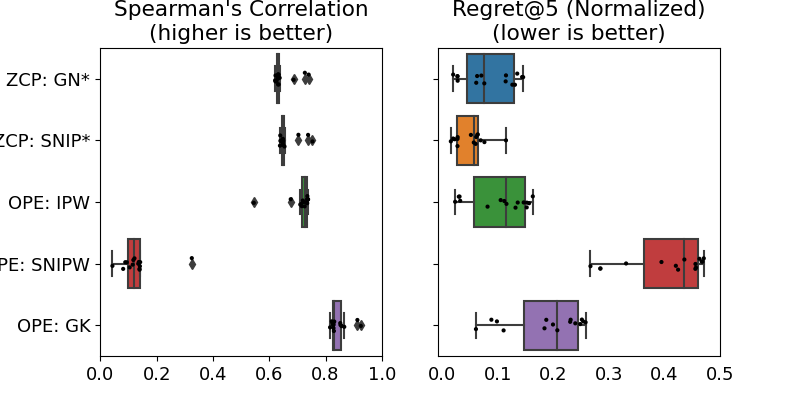

In [59]:
plt.figure(figsize=(8, 4))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title("Spearman's Correlation\n(higher is better)")
sns.boxplot(y="method", x="correlation", data=boxplot_df)
sns.stripplot(y="method", x="correlation", data=boxplot_df, color="black", s=3)
plt.ylabel("Ranking Method")
plt.xlabel("")
# plt.xticks(rotation=45)
plt.xticks(np.arange(0.0, 1.1, step=0.2))
plt.subplot(1, 2, 2)
K = 5
b2 = sns.boxplot(y="method", x="regret_at_k", data=regret_df)
b2 = sns.stripplot(y="method", x="regret_at_k", data=regret_df, color="black", s=3)
b2.set(yticklabels=[])  
b2.set(ylabel=None)
b2.tick_params(bottom=False)
plt.title(f"Regret@{K} (Normalized)\n(lower is better)")
plt.xlabel("")
# plt.xticks(rotation=45)
# plt.axes().get_yaxis().set_visible(False)
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.savefig("plots/both_metrics_boxplot_29_09_2022.pdf", dpi=300, bbox_inches="tight")

In [17]:
boxplot_df[boxplot_df["method"] == "ZCP: SNIP*"]["correlation"].describe()

count    15.000000
mean      0.663084
std       0.037085
min       0.638014
25%       0.644774
50%       0.648282
75%       0.651904
max       0.753614
Name: correlation, dtype: float64

In [14]:
[val for val in boxplot_df[boxplot_df["method"] == "OPE: GK"]["correlation"].values]

[0.8665787459184072,
 0.8248664070380455,
 0.8220450767562436,
 0.8567864495745822,
 0.8274026904058761,
 0.8523376439192383,
 0.8310082368298489,
 0.9253365513031825,
 0.8284257759348478,
 0.8531162473233002,
 0.8296487697010182,
 0.913219779562444,
 0.8270525685315551,
 0.8161248772270485,
 0.8282453118260984]